# I. Pen-and-paper

In [1]:
# Este codigo foi usado para calcular P(Y1 = 0.38, Y2 = 0.52 | B)

import numpy as np
from scipy.stats import multivariate_normal

mu = np.array([0.5925, 0.3275])
cov_matrix = np.array([[0.02289, -0.0097583], [-0.0097583, 0.03149]])

point = np.array([0.38, 0.52])

mvn = multivariate_normal(mean=mu, cov=cov_matrix)

pdf_value = mvn.pdf(point)

print("PDF at point (0.38, 0.52):", pdf_value)

PDF at point (0.38, 0.52): 1.962388853983138


In [2]:
# Este codigo foi usado para calcular P(Y1 = 0.42, Y2 = 0.59 | A)

import numpy as np
from scipy.stats import multivariate_normal

mu = np.array([0.24, 0.52])
cov_matrix = np.array([[0.0064, 0.0096], [0.0096, 0.0336]])

point = np.array([0.42, 0.59])

mvn = multivariate_normal(mean=mu, cov=cov_matrix)

pdf_value = mvn.pdf(point)

print("PDF at point (0.42, 0.59):", pdf_value)

PDF at point (0.42, 0.59): 0.4030709859326153


In [3]:
# Este codigo foi usado para calcular P(Y1 = 0.42, Y2 = 0.59 | B)

import numpy as np
from scipy.stats import multivariate_normal

mu = np.array([0.5925, 0.3275])
cov_matrix = np.array([[0.02289, -0.0097583], [-0.0097583, 0.03149]])

point = np.array([0.42, 0.59])

mvn = multivariate_normal(mean=mu, cov=cov_matrix)

pdf_value = mvn.pdf(point)

print("PDF at point (0.42, 0.59):", pdf_value)

PDF at point (0.42, 0.59): 1.7285938872724993


# II. Programming and critical analysis

In [2]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# 1. a)

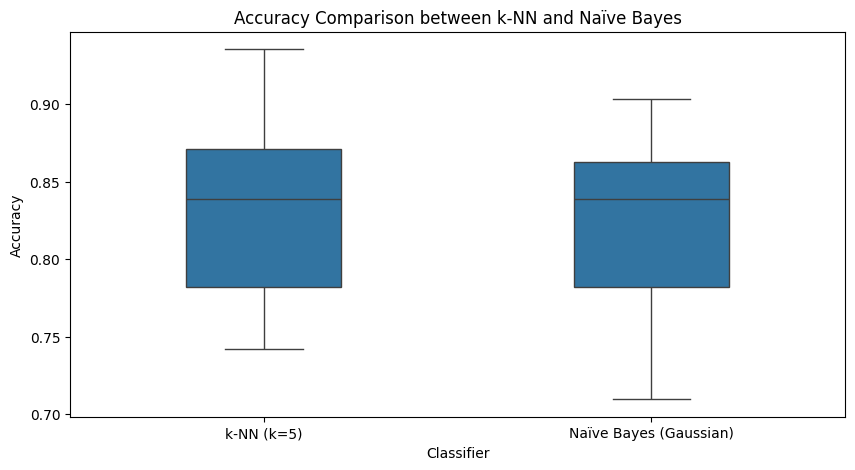

In [3]:
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

data = loadarff('column_diagnosis.arff')

df = pd.DataFrame(data[0])

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

x = df.drop('class', axis=1)
y = df['class']

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

knn_accuracies = []
nb_accuracies = []

for train_idx, test_idx in cv.split(x, y):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    knn_classifier.fit(x_train, y_train)
    knn_pred = knn_classifier.predict(x_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_accuracies.append(knn_accuracy)

    nb_classifier.fit(x_train, y_train)
    nb_pred = nb_classifier.predict(x_test)
    nb_accuracy = accuracy_score(y_test, nb_pred)
    nb_accuracies.append(nb_accuracy)

results_df = pd.DataFrame({'Classifier': ['k-NN (k=5)'] * 10 + ['Naïve Bayes (Gaussian)'] * 10, 'Accuracy': knn_accuracies + nb_accuracies})

plt.figure(figsize=(10, 5))
sns.boxplot(x='Classifier', y='Accuracy', data=results_df, width=0.4)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between k-NN and Naïve Bayes')
plt.show()

# b)

In [4]:
import scipy.stats as stats

_, p_value = stats.ttest_rel(knn_accuracies, nb_accuracies)

print("is k-NN statistically superior to Naive Bayes regarding accuracy? (p-value =", p_value, ")")

is k-NN statistically superior to Naive Bayes regarding accuracy? (p-value = 0.38085618124128184 )


Ao fazer um teste de hipotese com <br>
$H_0 : accuracy_{kNN} = accuracy_{Naive Bayes}$<br>
$H_1 : accuracy_{kNN} > accuracy_{Naive Bayes}$<br>
Obtivemos o p-value = 0.19042809062064092, o que significa que não rejeitamos $H_0$ para os valores de significância usuais (1%, 5%, 10%). Concluindo assim, que não é possível afirmar que kNN é estatisticamente superior a Naïve Bayes em termos de accuracy, sendo também impossível tirar outras conclusões sem mais testes de hipotese.

# 2.

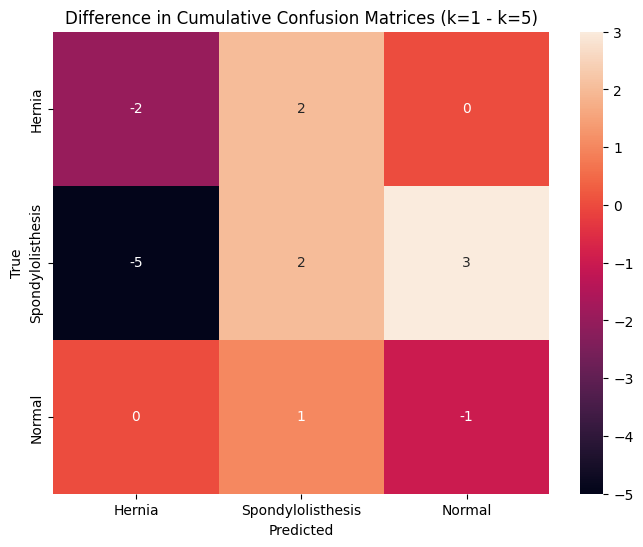

In [5]:
import numpy as np
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = loadarff('column_diagnosis.arff')

df = pd.DataFrame(data[0])

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

x = df.drop('class', axis=1)
y = df['class']

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# O KNeighborsClassifier ja usa a Euclidean distance e os pesos uniformes por default
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)

cumulative_cm1 = np.zeros((3, 3))
cumulative_cm5 = np.zeros((3, 3))

for train_idx, test_idx in cv.split(x, y):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    knn1.fit(x_train, y_train)
    knn5.fit(x_train, y_train)

    y_pred1 = knn1.predict(x_test)
    y_pred5 = knn5.predict(x_test)

    cm1 = confusion_matrix(y_test, y_pred1)
    cm5 = confusion_matrix(y_test, y_pred5)

    cumulative_cm1 += cm1
    cumulative_cm5 += cm5

diff_cm = cumulative_cm1 - cumulative_cm5

class_names = ["Hernia", "Spondylolisthesis", "Normal"]

plt.figure(figsize=(8, 6))
sns.heatmap(diff_cm, annot=True, fmt='g', cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title("Difference in Cumulative Confusion Matrices (k=1 - k=5)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("Exercicio2.png")
plt.show()

Em cada célula da matriz da diferença entre matrizes de confusão é possível ver qual dos modelos tem mais observações para essa célula em específico: se for um valor positivo kNN com k = 1 tem mais observações, se for um valor negativo é o kNN com k = 5 e se for um valor nulo têm o mesmo número de observações. Ao analisar a matrix da differença entre as matrizes de confusão, concluiu-se que o kNN com k = 5 é melhor do que o kNN com k = 1 em termos de accuracy, isto é acertou mais vezes, já que a soma dos valores na diagonal é um número negativo (-2 + 2 - 1 = -1). Para além disso, também é possível observar que o kNN com k = 5 teve menos previsões incorretas do que o kNN com k = 1 uma vez que o total de previsões erradas é um número positivo (2 + 0 + 3 - 5 + 0 + 1 = 1). Por fim, é possível concluir que o kNN com k = 5 é ligeiramente melhor do que o kNN = 1 neste caso.

# 3.

1. Uma das características da utilização de Naïve Bayes é assumir que os dados são independentes entre si. Para este conjunto de dados isso pode não se verificar já que estamos a lidar com dados relativos à saúde. Isso torna-se ainda mais notável para o nosso conjunto porque alguns dados referem-se ao mesmo orgão, como é o caso de pelvic_incidence, pelvic_tilt e pelvic_radius.
2. Naïve Bayes é normalmente utilizado com variáveis categoricas. No nosso caso todas as variáveis possuem dados numéricos continuos e podem não seguir uma distribuição Gaussiana como Naïve Bayes prevê. Desta forma a utilização de Naïve Bayes pode levar a previsões pouco precisas.
3.  Por fim, a utilização de Naïve Bayes também pode trazer problemas para conjuntos de dados que tenham as suas classes desbalanceadas. Como funciona através de probabilidades pode acabar por atribuir uma baixa probabilidade a uma classe que tenha uma frequência relativa baixa, mesmo sendo uma classe importante. No nosso caso, de 309 amostras, apenas 59 se referem a Disk Hernia (aproximandamente 19%), 149 a Spondylolisthesis (aproximadamente 48%) e 99 a Normal (aproximandamente 32%).